## Analysis of release date in the MCU movie data set

In [120]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [121]:
# load data

data = pd.read_csv('movie.metadata.tsv', header=None,  delimiter='\t', on_bad_lines = 'warn') 

In [122]:
# preparations of the data

data.columns = ['wiki_ID', 'freebase_ID', 'movie_name', 'release_date', 'box_office_revenue', 'runtime', 'language', 'countries', 'genres']
number_nan_values = data['release_date'].isna().sum()
print('Number of NaN values: ', number_nan_values)

# transform the string representation to date-time representation
# coerce sets invalid parsing to NaT, this applies for one date which is out of bounds
data['release_date'] = pd.to_datetime(data['release_date'], errors= 'coerce', utc= True)

number_nan_values = data['release_date'].isnull().sum()
print('Number of NaN values: ', number_nan_values)

data.head(10)


Number of NaN values:  6902
Number of NaN values:  6903


,wiki_ID,freebase_ID,movie_name,release_date,box_office_revenue,runtime,language,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16 00:00:00+00:00,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01 00:00:00+00:00,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29 00:00:00+00:00,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16 00:00:00+00:00,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,1974-01-01 00:00:00+00:00,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,1960-01-01 00:00:00+00:00,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


In [123]:
# statistics of the release date
print(data['release_date'].agg(['min', 'max', 'mean', 'median']))
quantils = data['release_date'].astype('int64').quantile().astype('datetime64[ns]')
print(quantils)

min                1888-01-01 00:00:00+00:00
max                2016-06-08 00:00:00+00:00
mean     1977-10-12 11:46:07.610037696+00:00
median             1985-05-18 12:00:00+00:00
Name: release_date, dtype: datetime64[ns, UTC]
1980-06-20T00:00:00.000000000


TypeError: 'str' object is not callable

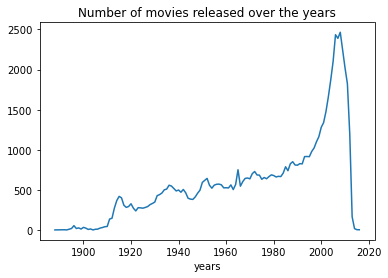

In [124]:
# plots
plt.plot(data['release_date'].groupby([data["release_date"].dt.year]).count())

plt.title("Number of movies released over the years")
plt.xlabel("years")
plt.ylabel("years")
plt.show()

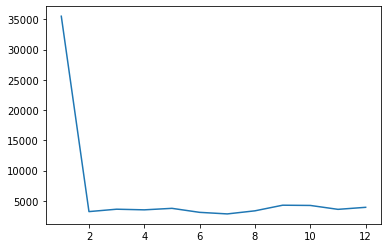

In [ ]:
# if no month/day is given the default january, the first
plt.plot(data['release_date'].groupby([data["release_date"].dt.month]).count())